In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#imported the libraries

In [2]:
data=pd.read_csv('train_LZV4RXX.csv')
#imported the data and saved in data

In [3]:
data.head()
#checked the head of the data to observe the columns and value types

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [4]:
data.shape
#checked the shape of the data

(7000, 10)

## Data Cleaning

In [5]:
data.columns
#checked the name of columns of the data

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none',
       'loan_default'],
      dtype='object')

In [6]:
data.dtypes
#checked the data types of columns of the data

loan_id               int64
age                   int64
education           float64
proof_submitted      object
loan_amount           int64
asset_cost            int64
no_of_loans           int64
no_of_curr_loans      int64
last_delinq_none      int64
loan_default          int64
dtype: object

In [7]:
data['education'].isna().unique()
#checking whether education contains null value or not

array([False,  True])

In [8]:
data['education'].value_counts()
#checking the no. of education values and different values it contain

2.0    3796
1.0    2959
Name: education, dtype: int64

In [9]:
data[data['education'].isna()==True]
#checking the data where education is nan

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
91,92,43,NaN,Aadhar,722556,997620,2,2,0,0
102,103,38,NaN,Aadhar,630636,816012,12,3,0,1
161,162,23,NaN,Aadhar,1085316,1517592,2,2,0,0
179,180,24,NaN,Aadhar,776736,1160748,0,0,0,1
228,229,23,NaN,Aadhar,572628,990240,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6851,6852,27,NaN,Aadhar,728964,948960,9,3,0,0
6867,6868,24,NaN,PAN,626136,1417080,0,0,0,0
6870,6871,22,NaN,Aadhar,749364,856224,0,0,0,1
6938,6939,23,NaN,Aadhar,474408,939816,0,0,0,1


Assuming that the education entries where there is NaN corresponds to people with no education. So filling it with 0 

In [10]:
data.education=data.education.fillna(0)

In [11]:
data['education'].value_counts()
#checking the no. of education values and different values it contain

2.0    3796
1.0    2959
0.0     245
Name: education, dtype: int64

Education is undoubtedly an important feature in determining Defaulters

In [12]:
data.proof_submitted.value_counts()
#checking different proofs submitted and their numbers

Aadhar      5931
VoterID      707
PAN          235
Driving      114
Passport      13
Name: proof_submitted, dtype: int64

Seeing the trend in value counts of proof submitted , it is quite clear that proof submitted also counts. Will see Passport cases for confirmation

In [13]:
data[data.proof_submitted=='Passport']
#seeing the pasport data for more insight

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
456,457,28,2.0,Passport,743364,1298676,0,0,0,0
1088,1089,29,1.0,Passport,461784,702024,0,0,0,0
2699,2700,49,1.0,Passport,633036,735924,18,7,0,0
2760,2761,34,2.0,Passport,425268,769428,0,0,0,0
3355,3356,27,1.0,Passport,667188,895176,0,0,0,1
3516,3517,25,2.0,Passport,532188,860400,0,0,0,0
4778,4779,24,0.0,Passport,639636,846780,0,0,0,1
5023,5024,45,1.0,Passport,723792,1083792,2,2,0,0
5498,5499,35,2.0,Passport,612036,799920,0,0,0,0
5649,5650,27,2.0,Passport,861600,1122000,0,0,0,0


The defaulters here are with 0 education or 1,does proof_submitted along with education is counting towards defaulters ,does this is also an import criteria for us. Later we will convert the string data to numeric using encoding

In [14]:
data.proof_submitted.isna().unique()

array([False])

No null value in proof submitted as expected since submitting proof is necessary

Further checking the nulls in other columns

In [15]:
data.loan_amount.isna().unique()

array([False])

In [16]:
data.asset_cost.isna().unique()

array([False])

In [17]:
data.no_of_loans.isna().unique()

array([False])

In [18]:
data.no_of_curr_loans.isna().unique()

array([False])

In [19]:
data.last_delinq_none.isna().unique()

array([False])

In [20]:
data.loan_default.isna().unique()

array([False])

In [21]:
data.head(2)

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0


In [22]:
data[data['loan_amount']>=data['asset_cost']].shape

(0, 10)

Every loan is a case where asset cost is more 

In [23]:
data['asset-loan']=data['asset_cost']-data['loan_amount']
#creating asset-loan to check if it can serve the problem for both togerther

In [24]:
data.head(2)

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,asset-loan
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0,316656
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0,102888


I want to observe the trend between loan amount and asset cost and also of them individually with loan_default and it won''t hurt to see the trend of every property with loan_default. Therfore should plot a correlation heatmap

In [25]:
import seaborn as sns

In [26]:
def func(x):
    if x=='Aadhar':
        return 0
    elif x=='VoterID':
        return 1
    elif x=='PAN':
        return 2
    elif x=='Driving':
        return 3
    else:
        return 4
data['proof_submitted_numeric']=data.proof_submitted.apply(func)
#created a function to allot numericals to each proof type and adding that column using apply

In [27]:
data.sample(10)
#checking random data to confirm the changes

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,asset-loan,proof_submitted_numeric
2314,2315,39,1.0,Aadhar,608436,799932,0,0,0,0,191496,0
3691,3692,27,1.0,Aadhar,638436,808788,6,2,0,0,170352,0
3980,3981,46,2.0,Aadhar,520728,838260,0,0,0,0,317532,0
197,198,33,2.0,Aadhar,615636,793788,0,0,0,1,178152,0
295,296,40,2.0,Aadhar,618156,811704,0,0,0,1,193548,0
2245,2246,22,0.0,Aadhar,662364,801000,0,0,0,0,138636,0
5158,5159,32,2.0,Aadhar,603636,847956,0,0,0,0,244320,0
307,308,32,2.0,Aadhar,354348,726000,0,0,0,0,371652,0
5356,5357,47,2.0,VoterID,808584,1184124,2,2,0,1,375540,1
1064,1065,25,1.0,Aadhar,490428,868656,3,0,0,0,378228,0


In [28]:
data.proof_submitted_numeric.value_counts()
#checking the value counts for confirmation

0    5931
1     707
2     235
3     114
4      13
Name: proof_submitted_numeric, dtype: int64

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'education'),
 Text(2.5, 0, 'loan_amount'),
 Text(3.5, 0, 'asset_cost'),
 Text(4.5, 0, 'no_of_loans'),
 Text(5.5, 0, 'no_of_curr_loans'),
 Text(6.5, 0, 'last_delinq_none'),
 Text(7.5, 0, 'loan_default'),
 Text(8.5, 0, 'proof_submitted_numeric'),
 Text(9.5, 0, 'asset-loan')]

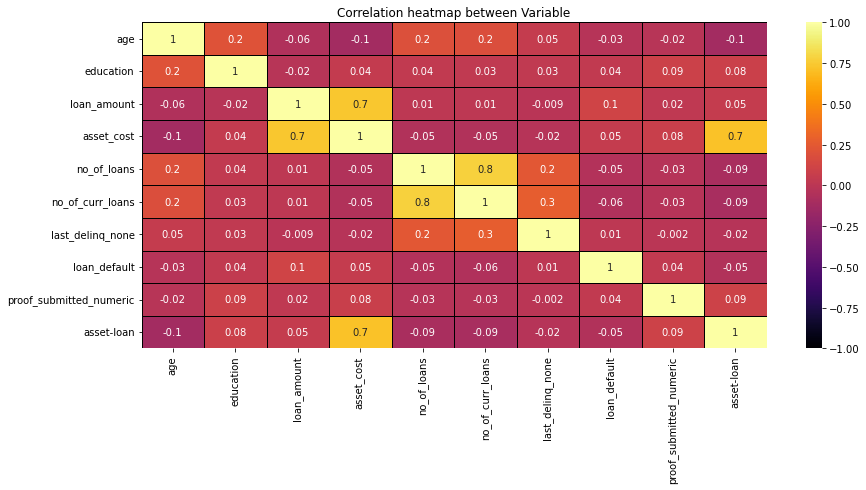

In [29]:
corr_data=data[['age','education','loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none',
       'loan_default','proof_submitted_numeric','asset-loan']].corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_data,annot=True,fmt=".1g",vmin=-1,vmax=1,center=0,cmap="inferno",linewidths=1,linecolor="Black")
heatmap.set_title("Correlation heatmap between Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)
#plotted the correlation heatmap to check the trend between different properties of interest

In [30]:
data.drop(columns='asset-loan',inplace=True)
#since its not much of use dropped it

In [31]:
data.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_numeric
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0,0


In [32]:
final=data.drop(columns='proof_submitted')
#dropping the proof_submitted column

In [33]:
final.head(2)

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_numeric
0,1,27,1.0,504264,820920,2,2,0,0,0
1,2,48,1.0,728556,831444,6,2,0,0,0


In [34]:
final.describe()
#checking the statistical data for insights like maximum minimum,like the data with 109 no_of_loans and so to further investigate

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_numeric
count,7000.000000,7000.000000,7000.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,36.096571,1.507286,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286,0.400000,0.224429
std,2020.870275,7.587700,0.565679,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504,0.489933,0.601045
min,1.000000,21.000000,0.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1750.750000,29.000000,1.000000,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3500.500000,36.000000,2.000000,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5250.250000,43.000000,2.000000,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000,1.000000,0.000000
max,7000.000000,50.000000,2.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000,4.000000


In [35]:
##109 value seems problematic so need to check if it is an filer

{'whiskers': [<matplotlib.lines.Line2D at 0x1e48105d190>,
 'caps': [<matplotlib.lines.Line2D at 0x1e48105d7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e48104ad00>],
 'medians': [<matplotlib.lines.Line2D at 0x1e48105df10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e48106a2e0>],
 'means': []}

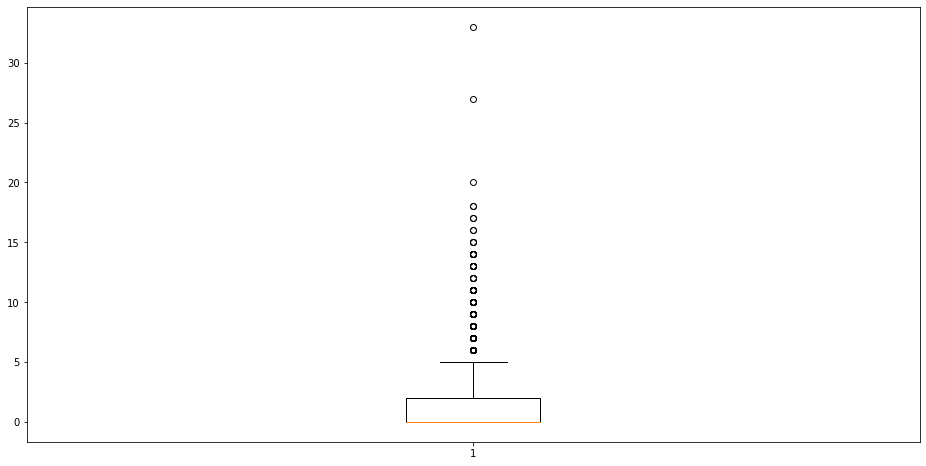

In [36]:
plt.figure(figsize=(16,8))
plt.boxplot(final['no_of_curr_loans'])
#plotting the boxplot to get insights about filers

In [37]:
final['no_of_loans'].value_counts()
#seeing the value counts to notice filers

0      3615
2      1032
3       617
4       377
5       258
6       214
7       144
8       130
9        88
10       80
11       56
13       46
12       46
15       37
14       32
16       31
18       26
17       25
20       24
19       15
22       14
21       11
23       10
24        9
26        8
25        6
27        4
31        4
35        3
30        3
44        2
38        2
28        2
32        2
34        2
36        2
64        2
29        2
54        1
50        1
43        1
70        1
79        1
77        1
41        1
58        1
46        1
40        1
33        1
39        1
37        1
55        1
57        1
48        1
52        1
109       1
45        1
Name: no_of_loans, dtype: int64

Need to remove outliers like 109 which can affect data adversely but no significant usage it has

In [38]:
final=final[(final['no_of_loans']<=23) & (final['no_of_curr_loans']<=11) ]
#removed the no of loans with less than 10 and no of current loans less than 15

In [39]:
final.shape
#checked the shape of new data

(6919, 10)

In [40]:
final.no_of_curr_loans.value_counts()
#confirming by the value counts

0     4220
2     1221
3      647
4      349
5      218
6      100
7       68
8       45
9       20
10      16
11      15
Name: no_of_curr_loans, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e4810c58e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e4810d4040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e4810c5550>],
 'medians': [<matplotlib.lines.Line2D at 0x1e4810d4760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e4810d4af0>],
 'means': []}

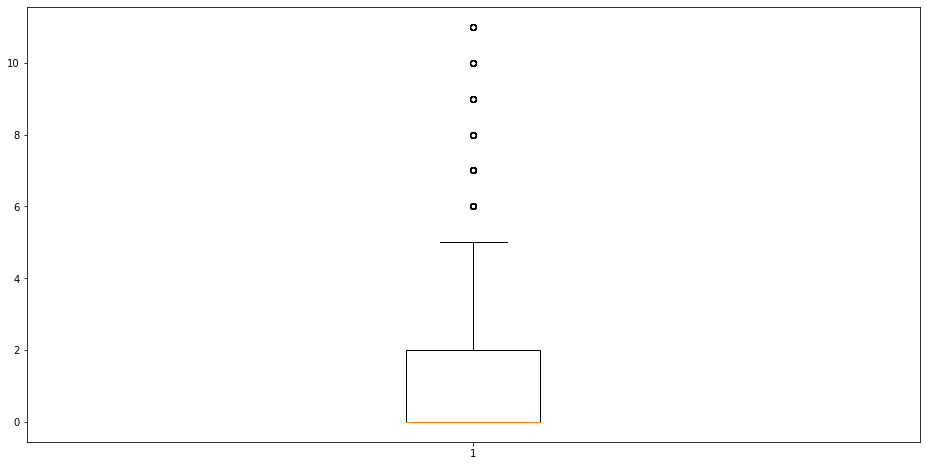

In [41]:
plt.figure(figsize=(16,8))
plt.boxplot(final['no_of_curr_loans'])
#confirming by the boxplot

Outliers reduced to a good amount

In [42]:
final.describe()
#again checking the describe for asset and loan amount

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_numeric
count,6919.000000,6919.000000,6919.000000,6.919000e+03,6.919000e+03,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000
mean,3506.190201,36.055644,1.505275,6.634178e+05,9.169542e+05,2.481428,1.273305,0.011273,0.400347,0.224165
std,2021.055229,7.597165,0.565915,1.501089e+05,2.151524e+05,3.917872,1.915012,0.105583,0.490004,0.599619
min,1.000000,21.000000,0.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1757.500000,29.000000,1.000000,5.777400e+05,7.980000e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3508.000000,36.000000,2.000000,6.571080e+05,8.586000e+05,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5255.500000,43.000000,2.000000,7.373640e+05,9.594600e+05,3.000000,2.000000,0.000000,1.000000,0.000000
max,7000.000000,50.000000,2.000000,1.781376e+06,2.419200e+06,23.000000,11.000000,1.000000,1.000000,4.000000


In [43]:
# Lets search for outliers of loan_amount and asset_cost to get a better data for modelling and getting better results

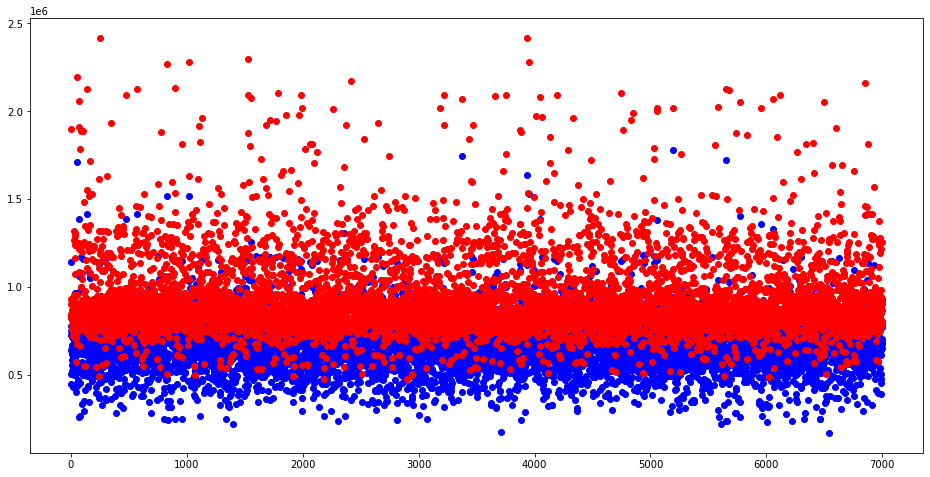

In [44]:
plt.figure(figsize=(16,8))
plt.scatter(final['loan_id'],final['loan_amount'],color='blue')
plt.scatter(final['loan_id'],final['asset_cost'],color='red')
#plotted the scatter plot to see the outliers quantity

Through scatterplots it is clear that there is no point of taking values of loan above 1.2 ND asset above 1.5 .SO lets filter them out and we are done with preprocessing, feature selection and eda. And we can prepare our data for modelling and stuff.

In [45]:
final=final[(final['loan_amount']<=1200000) & (final['asset_cost']<=1500000)]

In [46]:
final.reset_index(drop=True,inplace=True)
#resetting the index of final data

In [47]:
final

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_numeric
0,1,27,1.0,504264,820920,2,2,0,0,0
1,2,48,1.0,728556,831444,6,2,0,0,0
2,3,30,2.0,642936,826092,0,0,0,1,1
3,4,28,1.0,746556,930924,0,0,0,0,0
4,6,34,2.0,779784,902040,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6759,6995,40,2.0,696156,868584,0,0,0,1,0
6760,6996,45,2.0,930948,1258344,0,0,0,1,0
6761,6997,41,2.0,681108,791040,4,4,0,1,0
6762,6999,39,1.0,654708,793860,0,0,0,1,0


{'whiskers': [<matplotlib.lines.Line2D at 0x1e4811ab0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e4811ab7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e481199cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e4811abee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e4811b72b0>],
 'means': []}

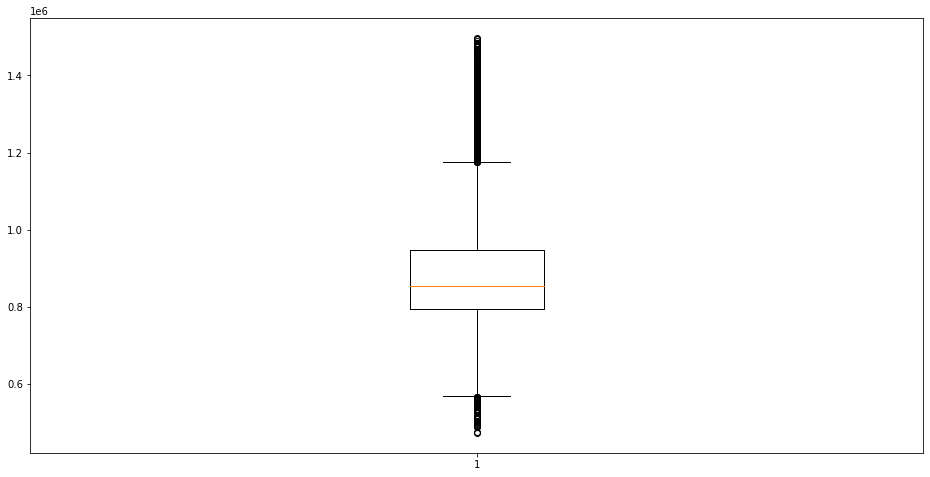

In [48]:
plt.figure(figsize=(16,8))
plt.boxplot(final['asset_cost'])

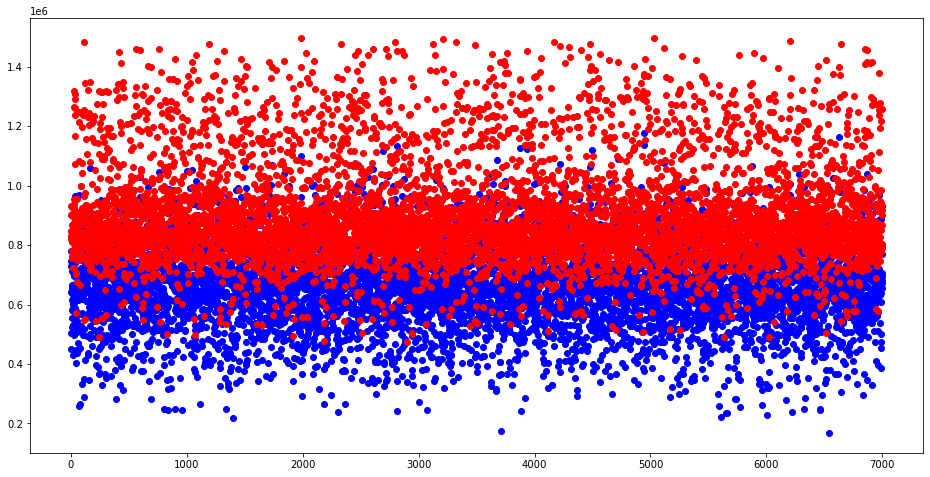

In [49]:
plt.figure(figsize=(16,8))
plt.scatter(final['loan_id'],final['loan_amount'],color='blue')
plt.scatter(final['loan_id'],final['asset_cost'],color='red')
#confirming the changes by scatter plot

In [50]:
#importing libraries for preprocessing and model traininng
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [51]:
final.head()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_numeric
0,1,27,1.0,504264,820920,2,2,0,0,0
1,2,48,1.0,728556,831444,6,2,0,0,0
2,3,30,2.0,642936,826092,0,0,0,1,1
3,4,28,1.0,746556,930924,0,0,0,0,0
4,6,34,2.0,779784,902040,0,0,0,1,0


In [52]:
final.drop(columns='loan_id',inplace=True)
#droping the loan_id column

In [53]:
a=final.loc[:,'loan_amount'].values.reshape(6764,1)
b=final.loc[:,'asset_cost'].values.reshape(6764,1)
#converting loan amount and asset cost to arrays for scaling the data

In [54]:
scaler=StandardScaler()
asc=scaler.fit_transform(a)
bsc=scaler.fit_transform(b)
#scaling both using StandardScaler

In [55]:
final['loan_amount_scaled']=asc
final['asset_cost_scaled']=bsc
#addding the scaled data to final

In [56]:
final.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_numeric,loan_amount_scaled,asset_cost_scaled
0,27,1.0,504264,820920,2,2,0,0,0,-1.123197,-0.457102
1,48,1.0,728556,831444,6,2,0,0,0,0.559806,-0.393352
2,30,2.0,642936,826092,0,0,0,1,1,-0.082654,-0.425772
3,28,1.0,746556,930924,0,0,0,0,0,0.694872,0.209260
4,34,2.0,779784,902040,0,0,0,1,0,0.944202,0.034292


In [57]:
X_train=final.loc[:,['age','education','no_of_loans','no_of_curr_loans','last_delinq_none','proof_submitted_numeric','loan_amount_scaled','asset_cost_scaled']].values
#creating the training array of independent variables using required columns

In [58]:
Y_train=final.loc[:,['loan_default']].values
#creating the training array of dependent variables using required column

In [59]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
#creating the KNN model for this classification problem

C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [60]:
test=pd.read_csv('test_4zJg83n.csv')
#importing the test data 

In [61]:
test.education.fillna(0,inplace=True)
test
#filling the nan value in education column

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.0,Aadhar,636936,768240,2,2,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0
4,7005,48,1.0,Aadhar,625236,839400,0,0,0
...,...,...,...,...,...,...,...,...,...
2995,9996,30,2.0,Aadhar,353808,823656,0,0,0
2996,9997,32,2.0,Aadhar,767364,919380,4,2,0
2997,9998,43,1.0,Aadhar,639456,773088,2,2,0
2998,9999,32,2.0,Aadhar,687108,907728,0,0,0


In [62]:
a=test.loc[:,'loan_amount'].values.reshape(3000,1)
b=test.loc[:,'asset_cost'].values.reshape(3000,1)
asc=scaler.fit_transform(a)
bsc=scaler.fit_transform(b)
test['loan_amount_scaled']=asc
test['asset_cost_scaled']=bsc
#scaling the two required columns

In [63]:
test.head()
#checking the changes

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_amount_scaled,asset_cost_scaled
0,7001,29,1.0,Aadhar,636936,768240,2,2,0,-0.179170,-0.687752
1,7002,28,1.0,Aadhar,548988,693060,3,3,0,-0.785388,-1.050952
2,7003,28,1.0,Aadhar,651756,936600,0,0,0,-0.077017,0.125608
3,7004,45,2.0,Aadhar,614676,744840,4,3,0,-0.332606,-0.800799
4,7005,48,1.0,Aadhar,625236,839400,0,0,0,-0.259817,-0.343973


In [64]:
test['proof_submitted_numeric']=test.proof_submitted.apply(func)
#converting to numericals

In [65]:
X_test=test.loc[:,['age','education','no_of_loans','no_of_curr_loans','last_delinq_none','proof_submitted_numeric','loan_amount_scaled','asset_cost_scaled']].values
#creating the test dataset of independent variables

In [66]:
test.loc[:,['age','education','no_of_loans','no_of_curr_loans','last_delinq_none','proof_submitted_numeric','loan_amount_scaled','asset_cost_scaled']]
#checking the indexes

,age,education,no_of_loans,no_of_curr_loans,last_delinq_none,proof_submitted_numeric,loan_amount_scaled,asset_cost_scaled
0,29,1.0,2,2,0,0,-0.179170,-0.687752
1,28,1.0,3,3,0,0,-0.785388,-1.050952
2,28,1.0,0,0,0,0,-0.077017,0.125608
3,45,2.0,4,3,0,0,-0.332606,-0.800799
4,48,1.0,0,0,0,0,-0.259817,-0.343973
...,...,...,...,...,...,...,...,...
2995,30,2.0,0,0,0,0,-2.130745,-0.420033
2996,32,2.0,4,2,0,0,0.719858,0.042417
2997,43,1.0,2,2,0,0,-0.161800,-0.664331
2998,32,2.0,0,0,0,0,0.166661,-0.013875


In [67]:
y_predicted=model.predict(X_test)
#predicting the test dataset

In [68]:
test.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_amount_scaled,asset_cost_scaled,proof_submitted_numeric
0,7001,29,1.0,Aadhar,636936,768240,2,2,0,-0.179170,-0.687752,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0,-0.785388,-1.050952,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0,-0.077017,0.125608,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0,-0.332606,-0.800799,0
4,7005,48,1.0,Aadhar,625236,839400,0,0,0,-0.259817,-0.343973,0


In [69]:
test['loan_default']=y_predicted
#adding the predcted column to test dataset

In [70]:
submission=test[['loan_id','loan_default']]
#creating the dataframe for submission

In [71]:
submission.shape

(3000, 2)

In [72]:
#submission.to_csv('Submission_TusharKantSao.csv')
#exporting the submission csv file
#Thank You

In [83]:
#using decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)

In [84]:
test['loan_default']=y_pred

In [85]:
submission=test[['loan_id','loan_default']]
#submission.to_csv('Submission_TusharKantSao.csv')

In [89]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)

C:\Users\tusha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [90]:
test['loan_default']=y_pred

In [91]:
submission=test[['loan_id','loan_default']]
submission.to_csv('Submission_TusharKantSao.csv')